#### Para rodar a aplicação, aperte na célula abaixo e clique no botão (Execute Cell and Below)

In [ ]:
#Precisa intalar as dependências necessárias
%pip install requests pandas matplotlib openpyxl

In [ ]:
import requests
import pandas as pd
import json
from pathlib import Path

URL = "https://criancaalfabetizada.caeddigital.net/portal/functions/getDadosResultado" # mesma URL do fetch-classes-by-school.http
HEADERS = {"content-type": "application/json"} # mesma header do fetch-classes-by-school.http tb

CD_INDICADOR = [
    "11988LP14","11988LP15","11988LP16","11988LP17","11988LP18",
    "11988MT14","11988MT15","11988MT16","11988MT17","11988MT18",
    "61988LP14","61988LP15","61988LP16","61988LP17","61988LP18",
    "61988MT14","61988MT15","61988MT16","61988MT17","61988MT18",
    "71988LP14","71988LP15","71988LP16","71988LP17","71988LP18",
    "71988MT14","71988MT15","71988MT16","71988MT17","71988MT18",
    "12016LP14","12016LP15","12016LP16","12016LP17","12016LP18",
    "12016MT14","12016MT15","12016MT16","12016MT17","12016MT18",
    "62016LP14","62016LP15","62016LP16","62016LP17","62016LP18",
    "62016MT14","62016MT15","62016MT16","62016MT17","62016MT18",
    "72016LP14","72016LP15","72016LP16","72016LP17","72016LP18",
    "72016MT14","72016MT15","72016MT16","72016MT17","72016MT18"
]

# turmas por escola 
payload = {
    "CD_INDICADOR": CD_INDICADOR,
    "agregado": "43188265",  # -> pelo visto eu preciso colocar o agregado da escola bem aqui (Obs!: Preciso analisar melhor essa parte)
    "filtros": [
        {"operation":"equalTo","field":"DADOS.VL_FILTRO_AVALIACAO","value":"AV22025"}
    ],
    "filtrosAdicionais": [],
    "nivelAbaixo": "1",
    "ordenacao": [["NM_ENTIDADE","ASC"]],
    "collectionResultado": None,
    "CD_INDICADOR_LABEL": [],
    "TP_ENTIDADE_LABEL": "01",
    "_ApplicationId": "portal",
    "_ClientVersion": "js2.19.0",
    "_InstallationId": "63e7d8d8-a570-42ba-a9af-8ce8bf044cf1",
    "_SessionToken": "r:e936f6f0d778e4447c34540e4aeb61a8"
}

COLS = [
    "NM_ENTIDADE","DC_ACERTOS","DC_PONTUACAO","TX_ACERTOS",
    "NU_ACERTO_HABILIDADE_1","NU_ACERTO_HABILIDADE_2","NU_ACERTO_HABILIDADE_3","NU_ACERTO_HABILIDADE_4",
    "NU_ACERTO_HABILIDADE_5","NU_ACERTO_HABILIDADE_6","NU_ACERTO_HABILIDADE_7","NU_ACERTO_HABILIDADE_8",
    "VL_FILTRO_DISCIPLINA"
]


In [ ]:
# extrai a lista de linhas do JSON 
def extract_rows(obj):
    if isinstance(obj, list):
        return obj
    if isinstance(obj, dict):
        if "result" in obj:
            r = extract_rows(obj["result"])
            if r: return r
        for k in ("data","rows","results","items"):
            v = obj.get(k)
            if isinstance(v, list):
                return v
        for v in obj.values():
            if isinstance(v, (dict, list)):
                r = extract_rows(v)
                if r: return r
    return []

# chama a API com POST
resp = requests.post(URL, json=payload, headers=HEADERS, timeout=60)
print("HTTP:", resp.status_code)
resp.raise_for_status()
full = resp.json()

# Aqui comeco a montar a minha analise (tabela)
rows = extract_rows(full)
df = pd.DataFrame(rows)
for c in COLS:
    if c not in df.columns:
        df[c] = None
df = df[COLS]

df # -> Aqui aparece a tabela com os dados mas sem aparecer ;são separados por vírgula


HTTP: 200


,NM_ENTIDADE,DC_ACERTOS,DC_PONTUACAO,TX_ACERTOS,NU_ACERTO_HABILIDADE_1,NU_ACERTO_HABILIDADE_2,NU_ACERTO_HABILIDADE_3,NU_ACERTO_HABILIDADE_4,NU_ACERTO_HABILIDADE_5,NU_ACERTO_HABILIDADE_6,NU_ACERTO_HABILIDADE_7,NU_ACERTO_HABILIDADE_8,VL_FILTRO_DISCIPLINA
0,1º ANO A,65,None,65,None,None,None,None,None,None,None,None,LÍNGUA PORTUGUESA
1,1º ANO A,78,None,78,None,None,None,None,None,None,None,None,MATEMÁTICA
2,1º ANO B,70,None,70,None,None,None,None,None,None,None,None,LÍNGUA PORTUGUESA
3,1º ANO B,84,None,84,None,None,None,None,None,None,None,None,MATEMÁTICA
4,2º ANO A,88,None,88,None,None,None,None,None,None,None,None,LÍNGUA PORTUGUESA
5,2º ANO A,95,None,95,None,None,None,None,None,None,None,None,MATEMÁTICA
6,2º ANO B,85,None,85,None,None,None,None,None,None,None,None,LÍNGUA PORTUGUESA
7,2º ANO B,91,None,91,None,None,None,None,None,None,None,None,MATEMÁTICA
8,3º ANO A,83,None,83,None,None,None,None,None,None,None,None,LÍNGUA PORTUGUESA
9,3º ANO A,76,None,76,None,None,None,None,None,None,None,None,MATEMÁTICA


In [ ]:
# fiz isso para salvar os arquivos em csv e xlsx

from pathlib import Path

out_dir = Path("tables")  
out_dir.mkdir(exist_ok=True)

df.to_csv(out_dir / "tabela.csv", sep=";", index=False, encoding="utf-8-sig")
df.to_excel(out_dir / "tabela.xlsx", index=False, sheet_name="Resultados")



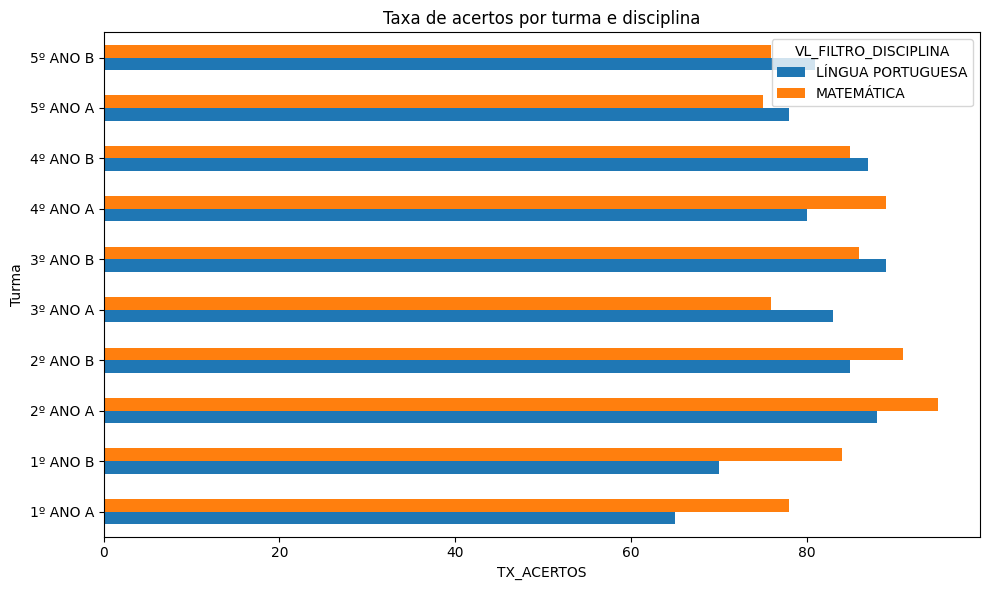

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# criei uma coluna numérica
df_plot = df.copy()
df_plot["TX_ACERTOS_NUM"] = pd.to_numeric(df_plot["TX_ACERTOS"], errors="coerce")

# construi o meu pivot table
pivot = (
    df_plot.pivot_table(
        index="NM_ENTIDADE",
        columns="VL_FILTRO_DISCIPLINA",
        values="TX_ACERTOS_NUM",
        aggfunc="mean"   
    )
    .sort_index()
)

# rodando o gráfico
ax = pivot.plot(kind="barh", figsize=(10, 6))
ax.set_xlabel("TX_ACERTOS")
ax.set_ylabel("Turma")
ax.set_title("Taxa de acertos por turma e disciplina")
plt.tight_layout()
plt.show()


#### Demonstração concluída. Preciso estudar para aplicar isso nas outras partes depois.